In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import glob
import os,sys
# Import Python Libraries
import iris
import iris.plot as iplt
from iris.analysis import MEAN, MAX, SUM
import matplotlib
matplotlib.pyplot.switch_backend('agg')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
%matplotlib inline
acpc_workspace='/group_workspaces/jasmin2/acpc'
acpc_workspace='/gws/nopw/j04/acpc'
#sys.path.append(os.path.join(acpc_workspace,'houston_deep_convection/Intercomparison/acpc_intercomparison'))
sys.path.append('/home/users/pmarinescu/acpc_intercomparison')
sys.path.append('/home/users/pmarinescu')
from acpc_intercomparison_3 import load_variable_cube,color,variable_names,directory,filename
#from Setup_intercomparison import load_variable_cube,color,variable_names,directory,filename
from collections import defaultdict, OrderedDict
f = lambda: defaultdict(f) 

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)

OrderedDict([('WRF_OXF', OrderedDict([('AccumPrecip', 'RAINNC'), ('OLR', 'OLR'), ('W', 'W'), ('T', 'air_temperature'), ('P', 'air_pressure'), ('rho', 'RHO'), ('U', 'U'), ('V', 'V'), ('QV', 'QVAPOR'), ('LH', 'LHRTOT'), ('QCLD', 'QCLOUD'), ('QRAIN', 'QRAIN'), ('QICE', 'QICE'), ('QSNOW', 'QSNOW'), ('QGRA', 'QGRAUP'), ('NCLD', 'QNCLOUD'), ('NRAIN', 'QNRAIN'), ('NICE', 'QNICE'), ('NSNOW', 'QNSNOW'), ('NGRA', 'QNGRAUPEL'), ('NAERO', 'NAER1'), ('QCOND', 'PCC'), ('QDEP', ''), ('QCNUC', ''), ('QINUC', 'MNUCCD'), ('liquid_hydrometeors', ['QCLOUD', 'QRAIN']), ('ice_hydrometeors', ['QICE', 'QSNOW', 'QGRAUP']), ('hydrometeors', ['QCLOUD', 'QRAIN', 'QICE', 'QSNOW', 'QGRAUP'])])), ('WRF_NASA', OrderedDict([('AccumPrecip', 'RAINNC'), ('OLR', 'TLWUP'), ('W', 'W'), ('T', 'air_temperature'), ('P', 'air_pressure'), ('rho', 'RHO'), ('U', 'U'), ('V', 'V'), ('QV', 'QVAPOR'), ('LH', 'LATHEAT'), ('QCLD', 'QCLOUD'), ('QRAIN', 'QRAIN'), ('QICE', 'QICE'), ('QSNOW', 'QSNOW'), ('QGRA', 'QGRAUP'), ('NCLD', 'QNCLOUD'

In [3]:
plotdir=os.path.join(acpc_workspace,'public/acpc/pmarin','Plots_Apr2020')
os.makedirs(plotdir,exist_ok=True)

savedir=os.path.join(acpc_workspace,'houston_deep_convection/Processing','Save_2024')
os.makedirs(savedir,exist_ok=True)


In [4]:
models=[]
models.append('COSMO_KIT')
models.append('ICON')
models.append('MesoNH_Toulouse')
models.append('RAMS_CSU')
models.append('UM_LEEDS')
models.append('WRF_NASA')
models.append('WRF_OXF')
models.append('WRF_PNNL')

cases=[]
cases.append('POL')
cases.append('CLN')

modelnames=[]
modelnames.append('COSMO')
modelnames.append('ICON')
modelnames.append('MesoNH')
modelnames.append('RAMS')
modelnames.append('UM')
modelnames.append('NU-WRF')
modelnames.append('WRF-Morr')
modelnames.append('WRF-SBM')

casenames=[]
casenames.append('High-Aero')
casenames.append('Low-Aero')


In [5]:
# Load in ICON data from other location
def call_ICON_mean_profile(vname, case, thr):

    import pickle
    savepath = '/gws/nopw/j04/acpc/users/pmarin/ICON_Profs_2/'
#    thr = 1e-05
#    vname = 'qr'
    print('ICON'+case)
    msum_prof = np.zeros(95)
    csum_prof = np.zeros(95)
    for t in np.arange(48,193):
        filename = 'BC_ICON_'+case+'_'+vname+'_tc'+str(thr)+str(t)+'_prof.p'
        [prof,cntprof,AGL_profmid] = pickle.load(open( savepath+filename, "rb" ) )

        cntprof[np.isnan(prof)] = 0
        prof[np.isnan(prof)] = 0

        msum_prof = msum_prof + (prof*cntprof)
        csum_prof = csum_prof + cntprof
    
    return(msum_prof/csum_prof,csum_prof,AGL_profmid)


_qtcp1
/gws/nopw/j04/acpc/houston_deep_convection/Processing/Save_2024/W


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'W' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


1084951


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'W' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


1257573
ICONPOL
ICONCLN


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'w' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


615190


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'w' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


433331


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'WC' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


1216319


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'WC' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


971334


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'w' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


353400


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'w' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


374105


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'W' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


498405


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'W' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


558146


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'W' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


459890


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'W' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


476708


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'W' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


554270


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'W' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


681562
_qtcp1
/gws/nopw/j04/acpc/houston_deep_convection/Processing/Save_2024/W


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'W' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


296669


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'W' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


382657
ICONPOL
ICONCLN


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'w' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


369994


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'w' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


249828


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'WC' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


1033251


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'WC' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


768135


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'w' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


229198


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'w' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


253096


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'W' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


190336


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'W' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


317853


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'W' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


301820


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'W' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


274212


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'W' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


291841


/home/users/pmarinescu/anaconda3/envs/ACPC_intercomparison/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'W' contains unknown cell method 'count'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)


598742
0 57


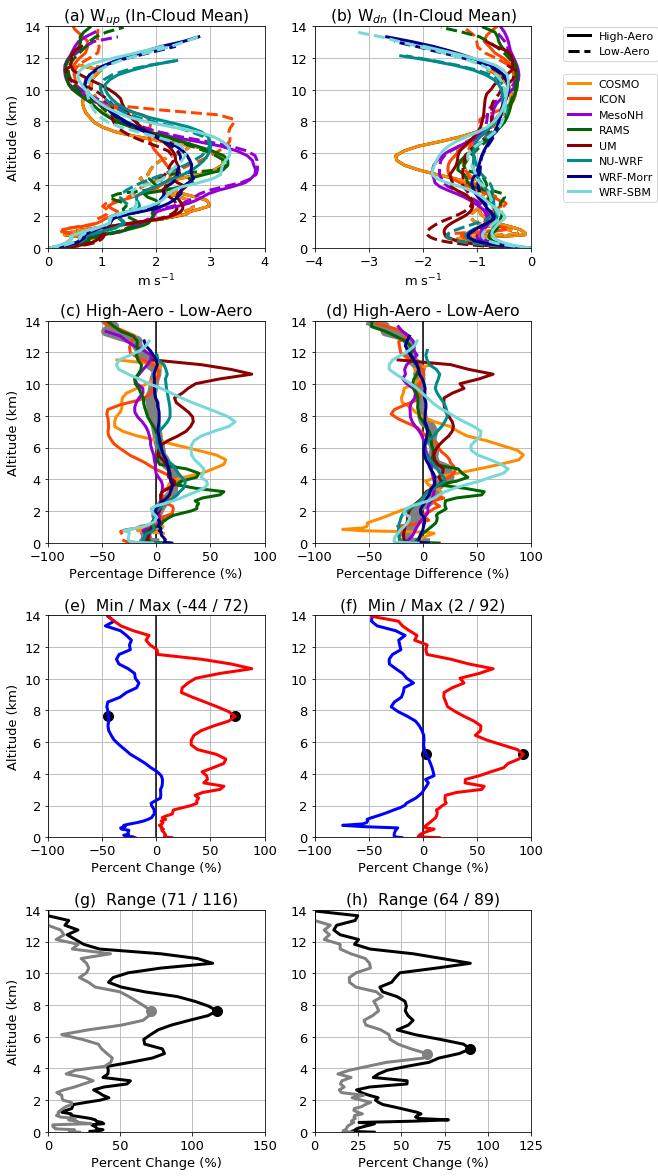

In [9]:
import numpy.ma as ma
import copy

#plt.rcParams.update({'font.size': 17})
#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(27/2.54,30/2.54))
#fig.subplots_adjust(left=0.1,right=0.65,hspace=0.7,
#                 bottom=0.05,top=0.95,wspace=0.4)
#fig.subplots_adjust(left=0.06,right=0.97,hspace=0.32,
#                 bottom=0.15,top=0.95,wspace=0.2)

plt.rcParams.update({'font.size': 13})
fig,ax = plt.subplots(nrows=4,ncols=2,figsize=(24/2.54,42/2.54))
#fig.subplots_adjust(left=0.1,right=0.65,hspace=0.7,
#                 bottom=0.05,top=0.95,wspace=0.4)
fig.subplots_adjust(top=0.80,hspace=0.4)


#threshs = ['','_qtcp1']
threshs = ['_qtcp1']
thrs = [0.0001]
tname = 'In-Cloud Mean'
xlims_l = [[-0,4],[-4,0]]
xlims_r = [[-100,100],[-100,100]]
xlims_ra = [[0,150],[0,125]]

#threshs = ['']
#thrs = [0]
#tname = 'Domain Mean'
#xlims_l = [[-0.05,0.05],[-0,0.5],[-0.5,0]]
#xlims_r = [[-200,200],[-50,50],[-50,50]]

samp_thr = 10000.
temp_arr = ma.masked_array(np.zeros((2,91,len(models))))
min_arr = ma.masked_array(np.zeros((2,91)))
max_arr = ma.masked_array(np.zeros((2,91)))
ran_arr = ma.masked_array(np.zeros((2,91)))
min2_arr = ma.masked_array(np.zeros((2,91)))
max2_arr = ma.masked_array(np.zeros((2,91)))
ran2_arr = ma.masked_array(np.zeros((2,91)))

dx = '500m'; dt = '5m'
# Line Styles for Clean and Polluted Cases
ls={}; ls['CLN']='--'; ls['POL']='-'

varnames = ['Wup','Wdn']
varnamesi = ['wPos','wNeg']
ttl_l0 = ['(a) ','(b) ']
ttl_l = ['W$_{up}$ ('+tname+')','W$_{dn}$ ('+tname+')']
ttl_r0 = ['(c) ','(d) ']
ttl_2 = ['(e) ','(f) ']
ttl_3 = ['(g) ','(h) ']

ylims = [0,14]

xlbls = ['m s$^{-1}$','m s$^{-1}$','m s$^{-1}$']
logs = [0,0,0]
scale_factors = [1,1,1] 

lws = 3
lwl = 3
##################################################
# Load and plot data for XYT Mean
# Loop through thresholds
##################################################

for v in np.arange(0,len(varnames)):
    for i in np.arange(0,len(threshs)):
        print(threshs[i])
        thresh=threshs[i]
        thr=thrs[i]
   
        varname = varnames[v]
        vnamei = varnamesi[v]
        scale_factor = scale_factors[i]
        savedir_i=os.path.join(savedir,'W')
        print(savedir_i)
        var_xyt_mean={}
        var_xyt_numb={}
        model_hgts={}
        for model in models:
            if model == 'ICON':
                for case in cases:
                    [var_xyt_mean[model,case],var_xyt_numb[model,case],model_hgts[model,case]]=call_ICON_mean_profile(vnamei, case, thr)
            else:
                for case in cases:
                    #print(model,case)
                    var_xyt_mean[model,case]=iris.load_cube(os.path.join(savedir_i,f'{varname}_xyt_mean_{model}_{case}_{dx}_{dt}{thresh}_varBC.nc'))
                    model_hgts[model,case] = var_xyt_mean[model,case].coord('geopotential_height').points
                    var_xyt_mean[model,case]=var_xyt_mean[model,case].data

                    var_xyt_numb[model,case]=iris.load_cube(os.path.join(savedir_i,f'{varname}_xyt_numb_{model}_{case}_{dx}_{dt}{thresh}_varBC.nc'))
                    var_xyt_numb[model,case]=var_xyt_numb[model,case].data
                    print(np.max(var_xyt_numb[model,case]))

        # Loop and Plot
        cnt = 0
        for model in models:
            cntc = 0
            for case in cases:
                var_xyt_mean[model,case][var_xyt_numb[model,case] < samp_thr] = np.nan
                #print(model,case)
                if cnt == 0:
                    ax[0,v].plot(var_xyt_mean[model,case]*scale_factor,
                            model_hgts[model,case]/1000.,
                            color='k',
                            ls=ls[case],
                            lw=lws,
                            label=f'{casenames[cntc]}')

                    ax[0,v].plot(var_xyt_mean[model,case]*scale_factor,
                            model_hgts[model,case]/1000.,
                            color=color[model],
                            ls=ls[case],
                            lw=lws,
                            label='_no_legend_')                    
                else:
                    ax[0,v].plot(var_xyt_mean[model,case]*scale_factor,
                            model_hgts[model,case]/1000.,
                            color=color[model],
                            ls=ls[case],
                            lw=lws)
                cntc = cntc + 1
            cnt = cnt + 1

        ax[0,v].set_xlabel(xlbls[v])
        ax[0,v].set_ylim(ylims)
        ax[0,v].set_xlim(xlims_l[v])
        if logs[v] == 1:
            ax[0,v].set_xscale('log')
        ax[0,v].set_title(ttl_l0[v]+ttl_l[v])

        ##################################################
        # Load and plot data for XYT Mean, no threshold, Absolute Differences and Percentage Differences
        ##################################################
        ax[1,v].plot([0,0],[0,20],'-k',lw=1.5)

        cnt = 0
        for model in models:
            var_pol = var_xyt_mean[model,'POL']*scale_factor
            var_cle = var_xyt_mean[model,'CLN']*scale_factor
            var_plot = (var_pol-var_cle) / var_cle * 100    

            for jj in np.arange(0,len(var_pol)):
                if (var_pol[jj] <= 0) and (var_cle[jj] >= 0):
                    var_plot[jj] = np.nan; 
                if (var_pol[jj] >= 0) and (var_cle[jj] <= 0):
                    var_plot[jj] = np.nan; 

            # Calculate median and range at each altitude
            if model == 'UM_LEEDS' or model == 'COSMO_KIT' or model == 'ICON':
                var_plot = np.flip(var_plot,axis=0)
            temp_arr[v,:,cnt] = copy.deepcopy(var_plot[0:91])
            
            cnt = cnt + 1
            
        min_arr[v,:] = np.nanmin(temp_arr[v,:,:],axis=1)
        max_arr[v,:] = np.nanmax(temp_arr[v,:,:],axis=1)
        ran_arr[v,:] = max_arr[v,:] - min_arr[v,:]

        ax[1,v].plot(np.nanmedian(temp_arr[v,:,:],axis=1),model_hgts[model,case][0:91]/1000.0,
                    color='gray',
                    ms=0,
                    linewidth=10,
                    linestyle='-',
                    label='_no_legend_')
        cnt = 0
        for model in models:
            var_pol = var_xyt_mean[model,'POL']*scale_factor
            var_cle = var_xyt_mean[model,'CLN']*scale_factor
            var_plot = (var_pol-var_cle) / var_cle * 100    

            for jj in np.arange(0,len(var_pol)):
                if (var_pol[jj] <= 0) and (var_cle[jj] >= 0):
                    var_plot[jj] = np.nan; 
                if (var_pol[jj] >= 0) and (var_cle[jj] <= 0):
                    var_plot[jj] = np.nan; 
            
            ax[1,v].plot(var_plot,
                            model_hgts[model,case]/1000.0,
                            color=color[model],
                            ls='-',
                            lw=lwl,
                            label=f'{modelnames[cnt]}')
            cnt = cnt + 1

        #ax.set_xticks(np.arange(-0.006,0.0021,0.002))
        ax[1,v].set_xlabel('Percentage Difference (%)')
    #    ax[0,1].set_ylabel('Altitude (km)')
        ax[1,v].set_ylim(ylims)
        ax[1,v].set_xlim(xlims_r[v])
        ax[1,v].set_title(ttl_r0[v]+'High-Aero - Low-Aero')

        # Calculate range excluding the min and max values
        for zzz in np.arange(0,91):
            temp_arr[v,zzz,:][temp_arr[v,zzz,:] == min_arr[v,zzz]] = np.nan
            temp_arr[v,zzz,:][temp_arr[v,zzz,:] == max_arr[v,zzz]] = np.nan
        min2_arr[v,:] = np.nanmin(temp_arr[v,:,:],axis=1)
        max2_arr[v,:] = np.nanmax(temp_arr[v,:,:],axis=1)
        ran2_arr[v,:] = max2_arr[v,:] - min2_arr[v,:]        

# Define altitude range for finding model ensemble statistics
id0 = 0 #km
id1 = 11 #km
zid0 = int(np.where(np.abs(model_hgts[model,case][0:91]/1000.0-id0) == np.min(np.abs(model_hgts[model,case][0:91]/1000.0-id0)))[0])
zid1 = int(np.where(np.abs(model_hgts[model,case][0:91]/1000.0-id1) == np.min(np.abs(model_hgts[model,case][0:91]/1000.0-id1)))[0])
print(zid0,zid1) # Print Model Levels
    
# Add Min Max Range to all plots    
for i in np.arange(0,2):
    mid = int(np.where(ran_arr[i,zid0:zid1] == np.nanmax(ran_arr[i,zid0:zid1]))[0])
    mid2 = int(np.where(ran2_arr[i,zid0:zid1] == np.nanmax(ran2_arr[i,zid0:zid1]))[0])

    ylims = [0,14]

    lw = 3
    ss = 100
    cs = ['blue','red','black','grey']    
    
    ax[2,i].plot(np.zeros(91),model_hgts[model,case][0:91]/1000.0,lw=1.5,c='k')
    ax[2,i].plot(min_arr[i,:],model_hgts[model,case][0:91]/1000.0,lw=lw,c=cs[0])
    ax[2,i].plot(max_arr[i,:],model_hgts[model,case][0:91]/1000.0,lw=lw,c=cs[1])
    ax[2,i].scatter(min_arr[i,mid],model_hgts[model,case][mid]/1000.0,s=ss,c=cs[2])
    ax[2,i].scatter(max_arr[i,mid],model_hgts[model,case][mid]/1000.0,s=ss,c=cs[2])
    ax[2,i].set_title(ttl_2[i]+' Min / Max ('+str(int(min_arr[i,mid]))+' / '+str(int(max_arr[i,mid]))+')',color=cs[2])
    #ax[0].set_title(r'\textcolor{blue}{Min}'+' / Max ('+str(np.round(min_arr[i,mid],1))+' / '+str(np.round(max_arr[i,mid],1))+')',color=cs[2])
    ax[2,i].set_xlabel('Percent Change (%)')
    ax[2,i].set_ylim(ylims)
    ax[2,i].set_xlim(xlims_r[i])

    ax[3,i].plot(np.zeros(91),model_hgts[model,case][0:91]/1000.0,lw=1,c='k')
    ax[3,i].plot(ran_arr[i,:],model_hgts[model,case][0:91]/1000.0,lw=lw,c=cs[2])
    ax[3,i].scatter(ran_arr[i,mid],model_hgts[model,case][mid]/1000.0,s=ss,c=cs[2])
    ax[3,i].plot(ran2_arr[i,:],model_hgts[model,case][0:91]/1000.0,lw=lw,c=cs[3])
    ax[3,i].scatter(ran2_arr[i,mid2],model_hgts[model,case][mid2]/1000.0,s=ss,c=cs[3])
    ax[3,i].set_title(ttl_3[i]+' Range ('+str(int(ran2_arr[i,mid2]))+' / '+str(int(ran_arr[i,mid]))+')',color=cs[2])
    ax[3,i].set_xlabel('Percent Change (%)')
    ax[3,i].set_ylim(ylims)
    ax[3,i].set_xlim(xlims_ra[i])
            
        
# Added gridded lines on all the plots
for i in np.arange(0,4):
    #ax[i,1].set_yticklabels([''])
    #ax[i,2].set_yticklabels([''])
    for j in np.arange(0,2):
        ax[i,0].set_ylabel('Altitude (km)')
        ax[i,j].grid()
    
#plt.tight_layout()   
#handles, labels = ax[0,0].get_legend_handles_labels()
#fig.legend(handles, labels, fontsize=12, loc='lower right',bbox_to_anchor=[0.95,0.06])
#fig.legend(handles, labels, fontsize=14, loc='lower left', ncol=1, bbox_to_anchor=[0.04,0.01])

#handles, labels = ax[1,0].get_legend_handles_labels()
#fig.legend(handles, labels, fontsize=12, loc='lower right',bbox_to_anchor=[0.95,0.43])
#fig.legend(handles, labels, fontsize=14, loc='lower left',ncol=4, bbox_to_anchor=[0.22,0.01])

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, fontsize=11, loc='upper left', ncol=1, bbox_to_anchor=[0.82,0.97])

handles, labels = ax[1,0].get_legend_handles_labels()
fig.legend(handles, labels, fontsize=11, loc='upper left', ncol=1, bbox_to_anchor=[0.82,0.93])


plotdir = '/gws/nopw/j04/acpc/public/pmarin/BAMS/Figs_2024/'
savename = 'PubBC_ACPC_W+cld'+str(thr)+'_Profiles_minmaxran'
fig.tight_layout(rect=[0,0,0.83,1.0])
fig.savefig(os.path.join(plotdir,savename+'.pdf'),dpi=300) 
fig.savefig(os.path.join(plotdir,savename+'.png'),dpi=300) 
fig.savefig(os.path.join(plotdir,savename+'.eps'),dpi=300)